In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [3]:
survey_raw_df.shape

(64461, 61)

In [4]:
survey_raw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
schema_raw = pd.read_csv('survey_results_schema.csv', index_col='Column').QuestionText

In [7]:
schema_raw['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [8]:
schema_raw['CompFreq']

'Is that compensation weekly, monthly, or yearly?'

## Cleaning

In [9]:
selected_cols = [
    'Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', # About person
    'Hobbyist', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', # Exp
    'Employment', 'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime', 'NEWEdImpt' # Employement
]  # Selecting all the important columns from the dataset

In [10]:
len(selected_cols)

20

In [11]:
df = survey_raw_df[selected_cols].copy()  # Taking all the selected columns from the original dataset

In [12]:
schema = schema_raw[selected_cols]  # Selecting all the questions from the selected_cols list

In [13]:
df.shape

(64461, 20)

In [14]:
schema.shape

(20,)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [16]:
df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [17]:
df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [18]:
df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

Setting all the non-numeric values to NaN

In [19]:
df['Age1stCode'] = pd.to_numeric(df.Age1stCode, errors='coerce')
df['YearsCode'] = pd.to_numeric(df.YearsCode, errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df.YearsCodePro, errors='coerce')

In [20]:
df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


Dropping the values which are lower than 10 and higher than 90

In [21]:
df = df.drop(df[df.Age < 10].index)  # Index of all the values which are lower than 10
df = df.drop(df[df.Age > 90].index)  # Index of all the values which are higher than 90
df = df.drop(df[df.WorkWeekHrs > 168].index)

In [22]:
df.loc[df.WorkWeekHrs > 168]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt


In [23]:
df['Gender'].value_counts()

Man                                                            45955
Woman                                                           3837
Non-binary, genderqueer, or gender non-conforming                382
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         74
Woman;Man;Non-binary, genderqueer, or gender non-conforming       24
Name: Gender, dtype: int64

In [24]:
df = df.where(~(df.Gender.str.contains(';', na=False)), np.nan)  # Replace all the values with NaN where condition is true

In [25]:
df.sample(3)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
12989,Germany,34.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,20.0,17.0,Bash/Shell/PowerShell;C;C#;C++;Go;HTML/CSS;Jav...,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...,Once a year,Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
56638,Nigeria,22.0,Man,Some college/university study without earning ...,"A business discipline (such as accounting, fin...",Yes,21.0,NaN,NaN,Java,Python,Every few months,Visit Stack Overflow,Student,NaN,NaN,NaN,Diversity of the company or organization;Speci...,NaN,NaN
29752,Netherlands,55.0,Man,Some college/university study without earning ...,"A natural science (such as biology, chemistry,...",Yes,14.0,41.0,25.0,Bash/Shell/PowerShell;Dart;HTML/CSS;JavaScript...,C;C#;C++;Python;Rust;TypeScript,Every few months,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, full-stack;Deve...",40.0,Very dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary


## Analysis and Visualization

In [26]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 6)
# matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['font.size'] = 12

Top countries who participated in the survey

In [27]:
df.Country.nunique()

183

In [28]:
top_country = df.Country.value_counts().head(10)  # Taking top 10 countries bcoz there are more than 180 countries
top_country

United States     12370
India              8367
United Kingdom     3880
Germany            3867
Canada             2174
France             1884
Brazil             1810
Netherlands        1332
Poland             1274
Australia          1199
Name: Country, dtype: int64

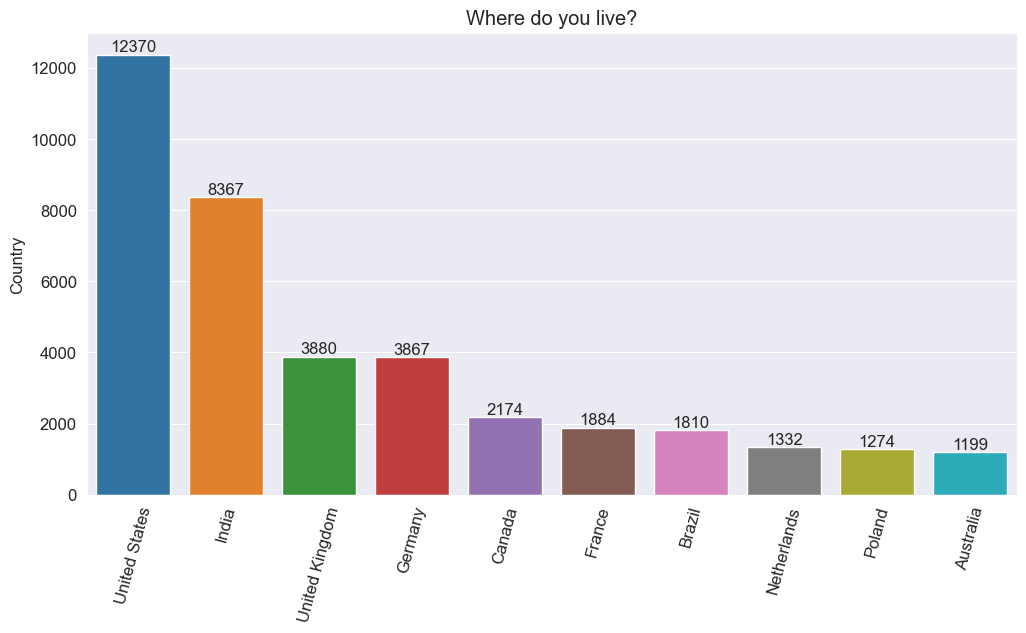

In [29]:
plt.title(schema.Country)
plt.xticks(rotation=75)
deg = sns.barplot(x=top_country.index, y=top_country);  # plotting the bar graph
for label in deg.containers:
    deg.bar_label(label)

Most of the participants were from US and India.

## Responses by age

In [30]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

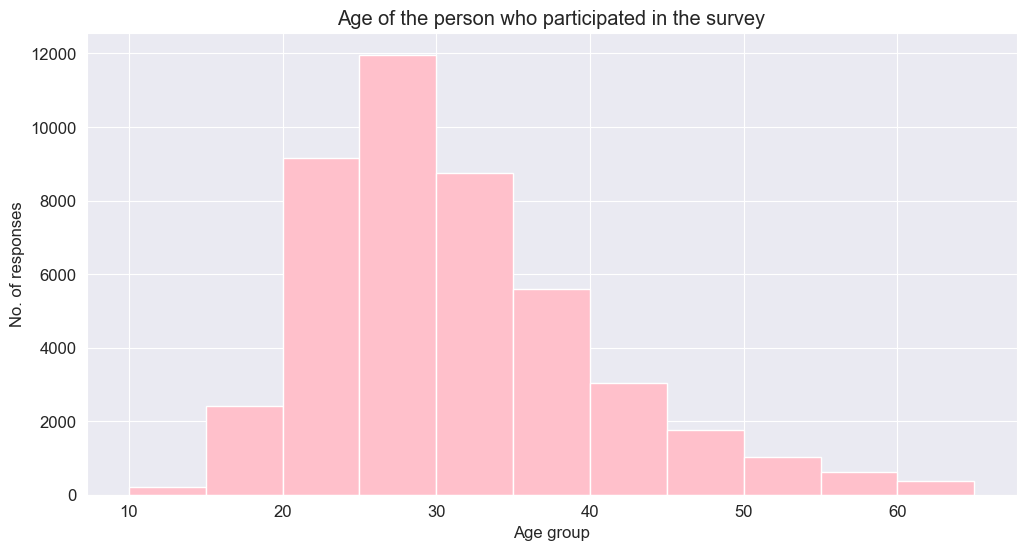

In [31]:
plt.ylabel('No. of responses')
plt.xlabel('Age group')
plt.title('Age of the person who participated in the survey')
plt.hist(df.Age, bins=np.arange(10, 70, 5), color='pink');  # starting from 10 and eanding at 70 with 5 steps and color is pink

Most of the people who participated in the survey falls into the age group of 15-50.
A the age goes above 40 the no of responses decreases.

## Gender

In [32]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [33]:
gender_count = df.Gender.value_counts()

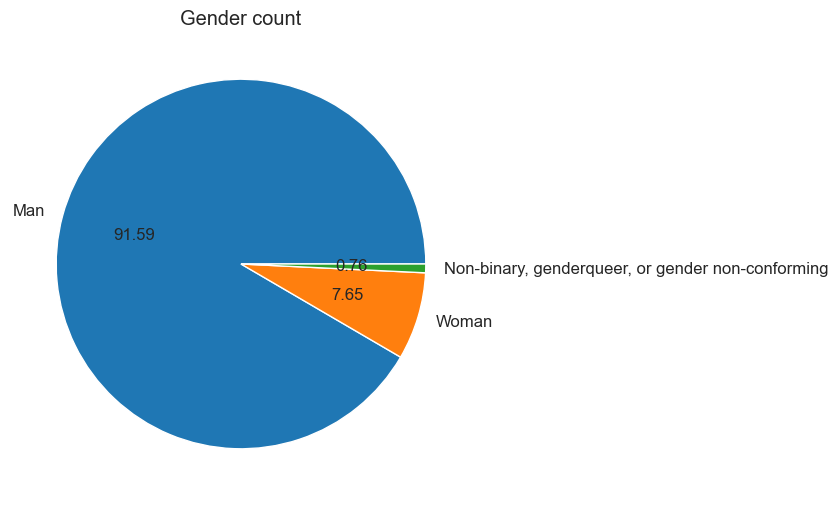

In [34]:
plt.title('Gender count')
plt.pie(gender_count, labels=gender_count.index, autopct='%.2f');

The most of the people who took participated in the survey were man and only 7.6% of the people were women.

## Education level

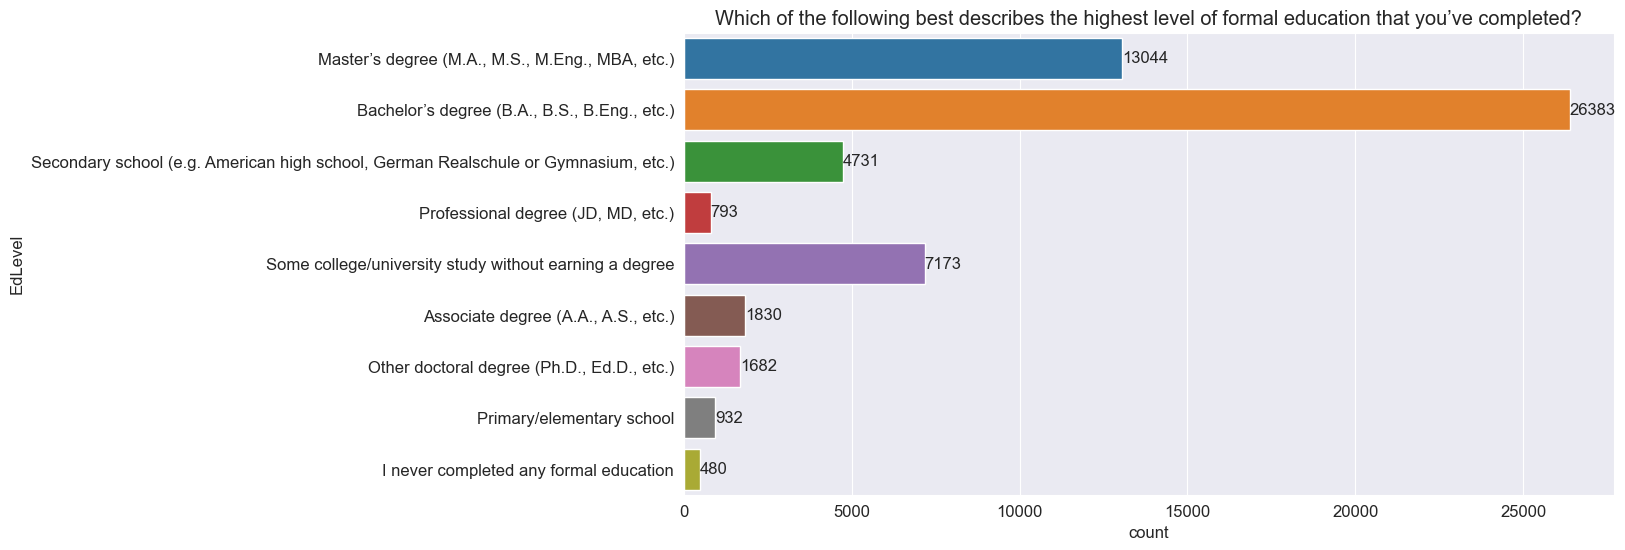

In [35]:
deg = sns.countplot(y=df.EdLevel)
plt.title(schema.EdLevel);
for label in deg.containers:
    plt.bar_label(label)

The people who did bachelor's degree and master's degree are most.

In [36]:
major = df.UndergradMajor.value_counts().head(10)
major

Computer science, computer engineering, or software engineering                   31389
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4741
Information systems, information technology, or system administration              4048
A natural science (such as biology, chemistry, physics, etc.)                      2189
Mathematics or statistics                                                          1837
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1368
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
Name: UndergradMajor, dtype: int64

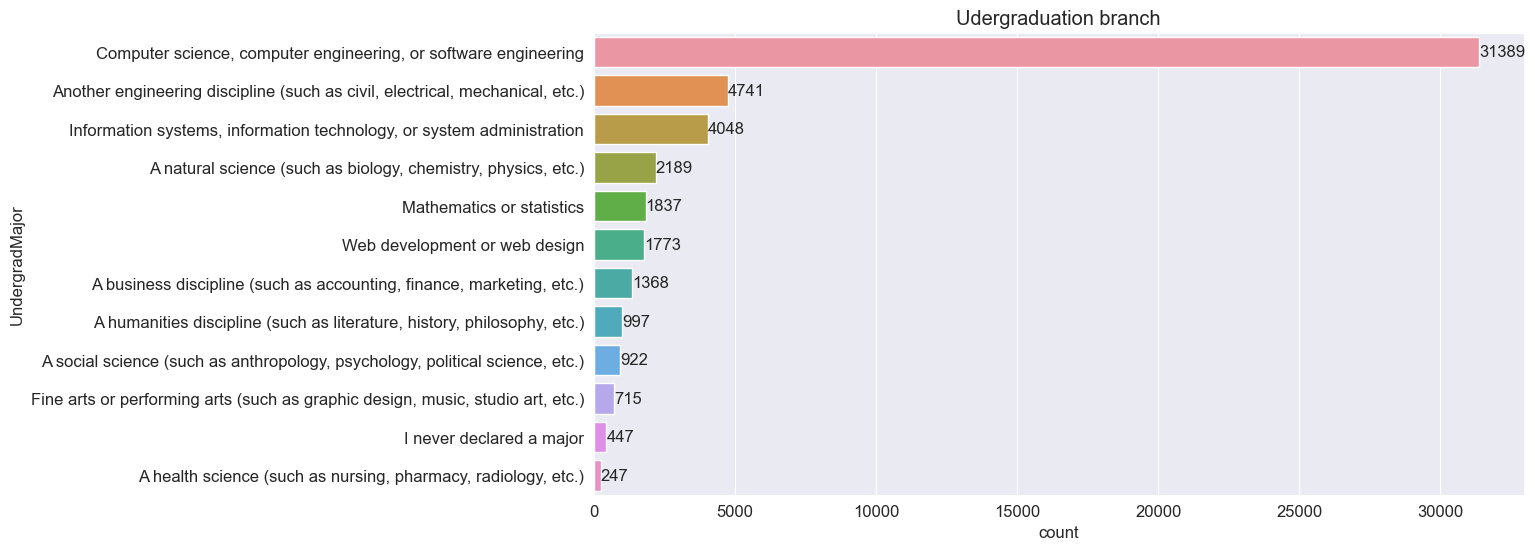

In [37]:
plt.title('Udergraduation branch')
deg = sns.countplot(y=df.UndergradMajor, order=df['UndergradMajor'].value_counts(ascending=False).index);  # Sorting the bars
for label in deg.containers:
    deg.bar_label(label)

From here we can see that the most of the people who participated in the survey had banch related to computer science.

In [38]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [39]:
op = df.NEWEdImpt.value_counts()

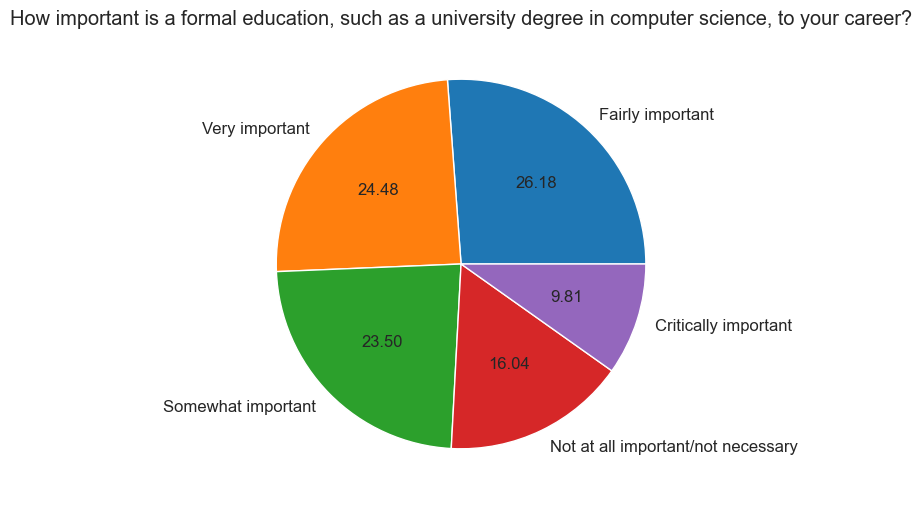

In [40]:
plt.title(schema.NEWEdImpt)
plt.pie(op, labels=op.index, autopct='%.2f');

Only the 50 percent of the people think that having computer science degree is important. It menas that you don't really need to have a degree in CS for tech jobs.

## Employment

In [41]:
schema.Employment

'Which of the following best describes your current employment status?'

In [42]:
df.Employment.value_counts()

Employed full-time                                      45013
Student                                                  7732
Independent contractor, freelancer, or self-employed     5635
Not employed, but looking for work                       2322
Employed part-time                                       2202
Not employed, and not looking for work                    318
Retired                                                   239
Name: Employment, dtype: int64

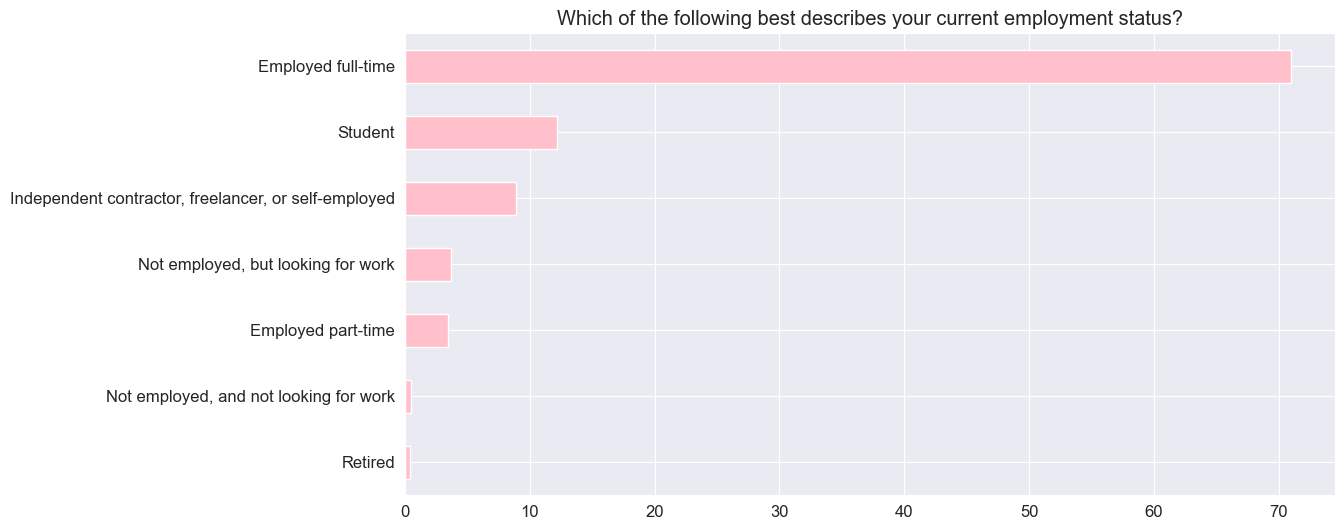

In [43]:
plt.title(schema.Employment)
plt.xlabel('Percentage')
(df.Employment.value_counts(normalize=True, ascending=True) * 100).plot(kind='barh', color='pink');  # Creating the horizental bar plot with the percentage of each category

More than 70 percent of the people were employed full time and there are > 10 percent of the people who were working as freelancer or were self employed.

In [44]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [45]:
sat = df.JobSat.value_counts()
sat

Very satisfied                        14519
Slightly satisfied                    13843
Slightly dissatisfied                  7080
Neither satisfied nor dissatisfied     5755
Very dissatisfied                      3713
Name: JobSat, dtype: int64

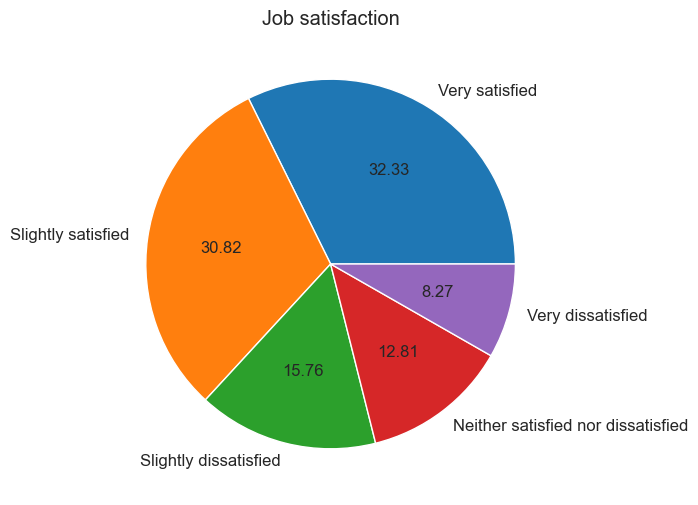

In [46]:
plt.title('Job satisfaction')
plt.pie(sat, labels=sat.index, autopct='%.2f');

In [47]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [48]:
opt = df.DevType.value_counts().head(15)
opt

Developer, full-stack                                                                                           4398
Developer, back-end                                                                                             3063
Developer, back-end;Developer, front-end;Developer, full-stack                                                  2216
Developer, back-end;Developer, full-stack                                                                       1466
Developer, front-end                                                                                            1394
Developer, mobile                                                                                               1249
Developer, front-end;Developer, full-stack                                                                       825
Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack     809
Developer, back-end;Developer, desktop or enterprise application

In [49]:
def split_col(col):
    res = col.to_frame()
    options = []
    for idx, value in col[col.notnull()].items():  # iterating through each value in the col which doesn't have null values
        for option in value.split(';'):  # Spliting
            if not option in res.columns:  # if the current value is not in the res dataframe
                options.append(option)
                res[option] = False
            res.at[idx, option] = True # If it is already present
    return res[options]

In [50]:
dev_type = split_col(df.DevType)
dev_type

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It returns all the options selected by the person at the time of survey

In [51]:
total = dev_type.sum().sort_values(ascending=False).head(5)
total

Developer, back-end                              27038
Developer, full-stack                            26950
Developer, front-end                             18161
Developer, desktop or enterprise applications    11707
Developer, mobile                                 9424
dtype: int64

The most popular choice is Developer, back-end and full-stack followed by front end etc.

## Questions

In [52]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [53]:
df.LanguageWorkedWith.value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                         1066
HTML/CSS;JavaScript                                                                  896
C#;HTML/CSS;JavaScript;SQL                                                           852
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                747
HTML/CSS;JavaScript;TypeScript                                                       696
                                                                                    ... 
C;C#;C++;HTML/CSS;Objective-C;SQL;Swift                                                1
C++;Dart;HTML/CSS;JavaScript;TypeScript                                                1
Bash/Shell/PowerShell;Go;Java;JavaScript;SQL                                           1
C;C#;HTML/CSS;PHP;Python;SQL                                                           1
Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift       1
Name: LanguageWorkedW

In [54]:
lang = split_col(df.LanguageWorkedWith)  # there are many values with ; and to take them differently
lang

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
total = lang.sum().sort_values(ascending=False)  # taking the sum of all the values 
total

JavaScript               38557
HTML/CSS                 35927
SQL                      31185
Python                   25101
Java                     22929
Bash/Shell/PowerShell    18815
C#                       17897
PHP                      14890
TypeScript               14466
C++                      13588
C                        12381
Go                        4991
Kotlin                    4432
Ruby                      4005
Assembly                  3506
VBA                       3470
Swift                     3363
R                         3257
Rust                      2892
Objective-C               2318
Dart                      2263
Scala                     2026
Perl                      1776
Haskell                   1196
Julia                      502
dtype: int64

There were 25 programming languages used in total and the most popular were -

In [56]:
perc = lang.mean().sort_values(ascending=False) * 100  # converting them into the percentage
perc

JavaScript               59.896230
HTML/CSS                 55.810666
SQL                      48.444224
Python                   38.993056
Java                     35.618971
Bash/Shell/PowerShell    29.228093
C#                       27.802029
PHP                      23.130816
TypeScript               22.472154
C++                      21.108229
C                        19.233219
Go                        7.753251
Kotlin                    6.884874
Ruby                      6.221553
Assembly                  5.446383
VBA                       5.390459
Swift                     5.224240
R                         5.059575
Rust                      4.492567
Objective-C               3.600889
Dart                      3.515449
Scala                     3.147282
Perl                      2.758921
Haskell                   1.857922
Julia                     0.779830
dtype: float64

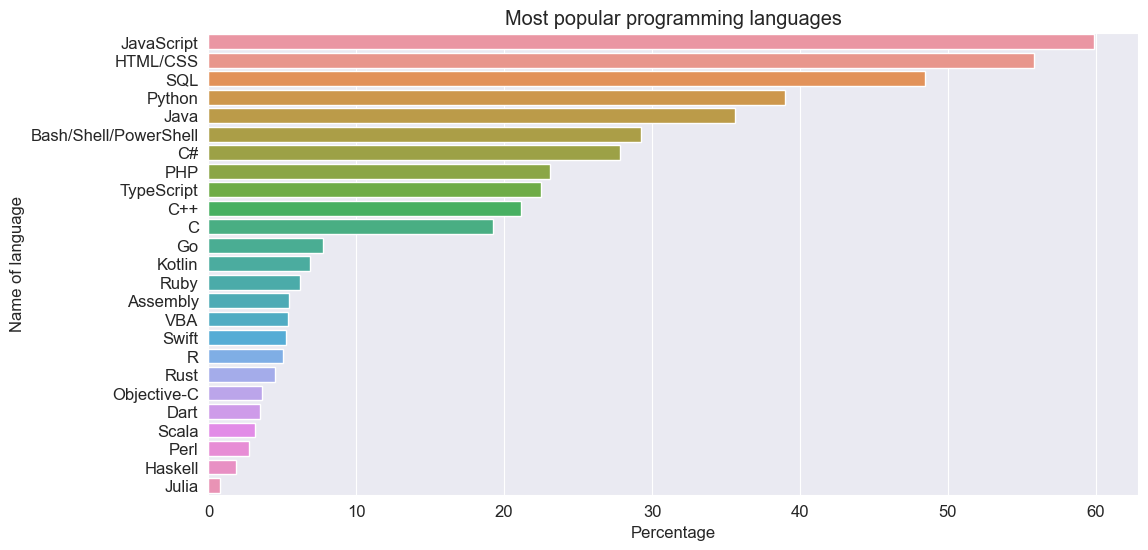

In [57]:
plt.title('Most popular programming languages')
plt.xlabel('Percentage')
plt.ylabel('Name of language')
sns.barplot(x=perc, y=perc.index);

The most popular languages were javascript, html/css, SQL, python etc

In [58]:
st = df[df['Employment'] == 'Student']  #  saperating all the values with students
st

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
14,France,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,4.0,NaN,Bash/Shell/PowerShell;C;HTML/CSS;Java;Python;SQL,Assembly;Bash/Shell/PowerShell;C;Go,Once every few years,Play games;Visit Stack Overflow;Panic,Student,NaN,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
20,Belgium,23.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,16.0,7.0,NaN,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Bash/Shell/PowerShell;C#;HTML/CSS;Java;Scala;S...,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Student,NaN,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
27,China,NaN,Man,Some college/university study without earning ...,"A health science (such as nursing, pharmacy, r...",Yes,22.0,2.0,NaN,Python;R,NaN,Every few months,Visit Stack Overflow;Do other work and come ba...,Student,NaN,NaN,NaN,Diversity of the company or organization;Langu...,NaN,NaN
28,Ukraine,18.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,15.0,NaN,NaN,C#;C++;HTML/CSS;Python,C#;HTML/CSS;Java;JavaScript;Kotlin;Python;SQL;...,Every few months,Meditate;Play games;Call a coworker or friend;...,Student,NaN,NaN,NaN,Specific department or team I’d be working on;...,NaN,NaN
39,United States,20.0,Woman,"Associate degree (A.A., A.S., etc.)",NaN,Yes,14.0,6.0,NaN,C;C#;C++;HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;Python,Once a year,NaN,Student,NaN,NaN,NaN,Industry that I’d be working in;Flex time or a...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64421,Costa Rica,17.0,"Non-binary, genderqueer, or gender non-conforming","Secondary school (e.g. American high school, G...",NaN,Yes,NaN,14.0,NaN,Assembly;C;C#;C++;Go;HTML/CSS;Java;JavaScript;...,Bash/Shell/PowerShell;Dart;Haskell;Julia;Rust;...,NaN,Meditate;Play games;Call a coworker or friend;...,Student,NaN,NaN,NaN,NaN,NaN,NaN
64426,Spain,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,10.0,NaN,Assembly;C;C++;Dart;HTML/CSS;Java;Kotlin;Pytho...,Assembly;C;C++;Go;Java;Kotlin;Python;Rust;Type...,Once a year,Play games;Visit Stack Overflow;Watch help / t...,Student,NaN,NaN,NaN,NaN,NaN,NaN
64441,Canada,17.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,10.0,7.0,NaN,C;C#;C++;Java,Assembly;C#;Kotlin,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Student,NaN,NaN,NaN,NaN,NaN,NaN
64444,Monaco,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,Yes,24.0,1.0,NaN,NaN,NaN,Every few months,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
st_lang = st.LanguageWorkedWith.value_counts()
st_lang

Python                                                                   146
HTML/CSS;JavaScript                                                       83
Java                                                                      74
HTML/CSS;JavaScript;Python                                                65
C++                                                                       50
                                                                        ... 
C++;Dart;Python                                                            1
Assembly;C;C#;C++;HTML/CSS;Java;JavaScript;Kotlin;SQL                      1
Assembly;C;C++;Haskell;Java;JavaScript;Python;Ruby                         1
Bash/Shell/PowerShell;HTML/CSS;Java;SQL;TypeScript                         1
Assembly;C;C++;Dart;HTML/CSS;Java;Kotlin;Python;R;Rust;SQL;TypeScript      1
Name: LanguageWorkedWith, Length: 3304, dtype: int64

In [60]:
st_df = split_col(st.LanguageWorkedWith)
st_df

,Bash/Shell/PowerShell,C,HTML/CSS,Java,Python,SQL,C#,JavaScript,Objective-C,Scala,...,Ruby,Julia,Assembly,Kotlin,Go,Rust,Dart,VBA,Haskell,Perl
14,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,True,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
27,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28,False,False,True,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39,False,True,True,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64421,False,True,True,True,True,True,True,True,True,False,...,True,False,True,True,True,False,False,True,False,True
64426,False,True,True,True,True,True,False,False,False,False,...,False,False,True,True,False,True,True,False,False,False
64441,False,True,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64444,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
per = st_df.mean().sort_values(ascending=False) * 100
per

HTML/CSS                 59.738748
Python                   56.492499
JavaScript               52.263321
Java                     49.107605
C++                      41.800310
C                        40.882049
SQL                      39.200724
Bash/Shell/PowerShell    25.530264
C#                       24.599069
PHP                      23.654941
Assembly                 13.308329
TypeScript               11.536472
R                         7.397827
Rust                      7.346094
Kotlin                    6.996896
Go                        5.975168
Dart                      5.380238
Swift                     4.630109
Haskell                   4.073978
Ruby                      3.892913
VBA                       3.867046
Scala                     2.056389
Objective-C               2.030523
Perl                      1.396793
Julia                     1.306260
dtype: float64

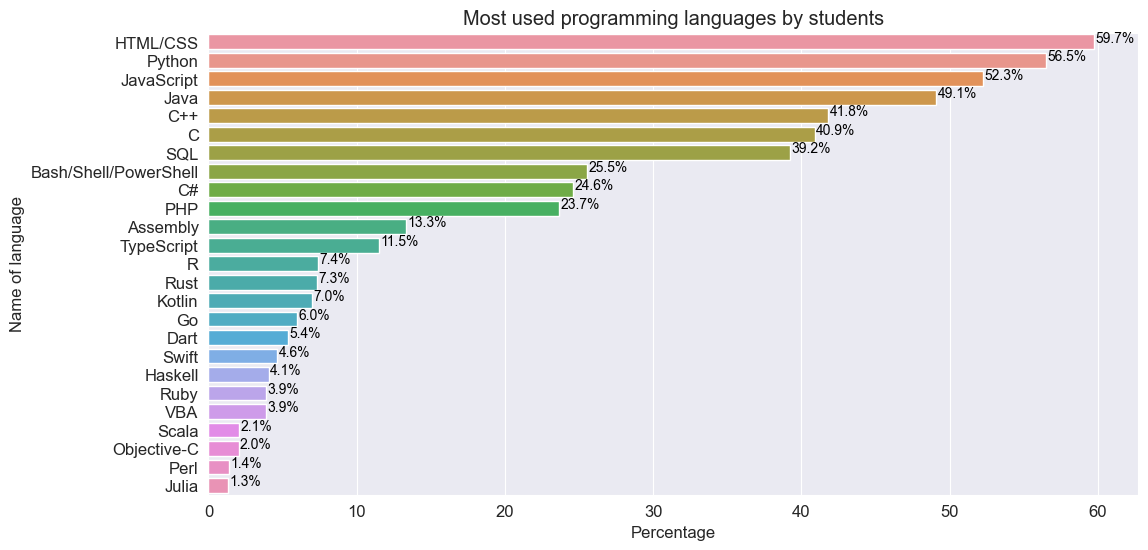

In [62]:
plt.title('Most used programming languages by students')
plt.xlabel('Percentage')
plt.ylabel('Name of language')
tr = sns.barplot(x=per, y=per.index);  # creating the bar plot
for i, v in enumerate(per):
    tr.text(per[i] + 0.1, i, f'{v:.1f}%', color='black', fontweight='light', fontsize='smaller')  # Showing the total percentage for each bar

The most used languages by students are html/css, python, js etc. 

In [63]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [64]:
df.LanguageDesireNextYear.value_counts()

Python                                                                                                                         1144
Rust                                                                                                                            525
HTML/CSS;JavaScript;TypeScript                                                                                                  499
C#                                                                                                                              458
Go                                                                                                                              410
                                                                                                                               ... 
Dart;Go;HTML/CSS;JavaScript;Objective-C;Ruby;SQL;Swift;TypeScript                                                                 1
HTML/CSS;JavaScript;Kotlin;Python;R;Swift                                   

In [65]:
lang_yr = split_col(df.LanguageDesireNextYear)
lang_yr

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
per = lang_yr.mean().sort_values(ascending=False) * 100
per

Python                   41.147686
JavaScript               40.428440
HTML/CSS                 32.042937
SQL                      30.800180
TypeScript               26.462958
C#                       21.066286
Java                     20.463548
Go                       19.435167
Bash/Shell/PowerShell    18.058813
Rust                     16.259923
C++                      15.017166
Kotlin                   14.767061
PHP                      10.944029
C                         9.367281
Swift                     8.694639
Dart                      7.310518
R                         6.571078
Ruby                      6.420394
Scala                     5.331428
Haskell                   4.593541
Assembly                  3.768661
Julia                     2.544545
Objective-C               2.342597
Perl                      1.761608
VBA                       1.610924
dtype: float64

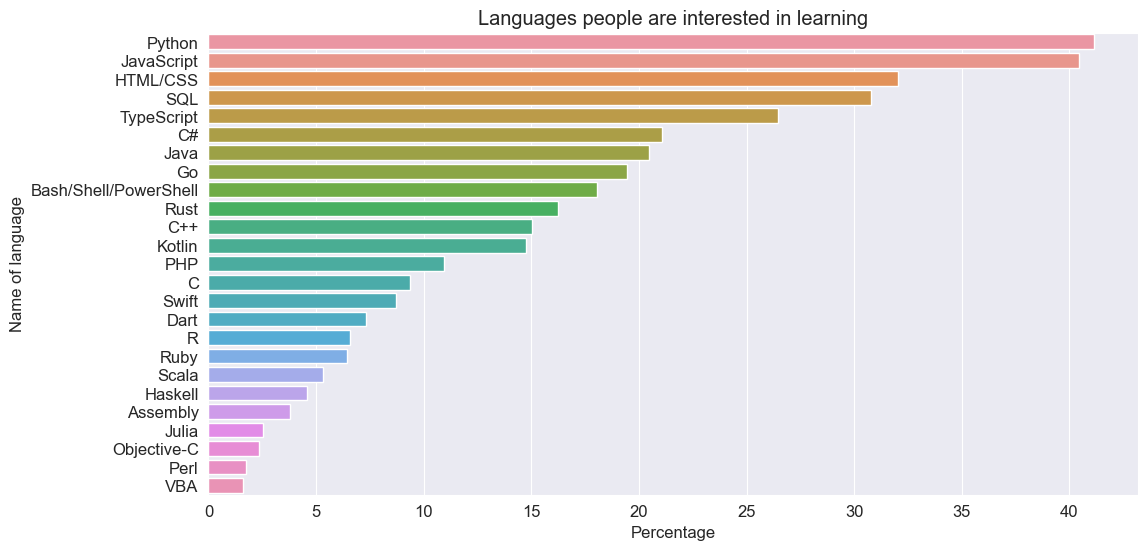

In [67]:
plt.title('Languages people are interested in learning')
plt.xlabel('Percentage')
plt.ylabel('Name of language')
sns.barplot(x=per, y=per.index);

Top languages people are interested in learning are python, javascript, html/css etc.

In [68]:
hrs = df.groupby('Country')['WorkWeekHrs'].mean()  # taking the avg of each country week work hrs
hrs

Country
Afghanistan                             46.500000
Albania                                 48.392857
Algeria                                 36.862069
Andorra                                 42.000000
Angola                                  72.333333
                                          ...    
Venezuela, Bolivarian Republic of...    40.125000
Viet Nam                                41.391667
Yemen                                   40.000000
Zambia                                  38.000000
Zimbabwe                                39.928571
Name: WorkWeekHrs, Length: 183, dtype: float64

In [69]:
hr = hrs.sort_values(ascending=False).head(15).round()  # taking the top 15 countries with most hrs of week work and round off
hr

Country
Angola                              72.0
Kuwait                              58.0
United Republic of Tanzania         55.0
Iraq                                52.0
Grenada                             50.0
Albania                             48.0
Maldives                            47.0
Afghanistan                         46.0
Iran                                46.0
Jordan                              46.0
Niger                               45.0
Djibouti                            45.0
Liechtenstein                       45.0
Saint Vincent and the Grenadines    45.0
Tajikistan                          45.0
Name: WorkWeekHrs, dtype: float64

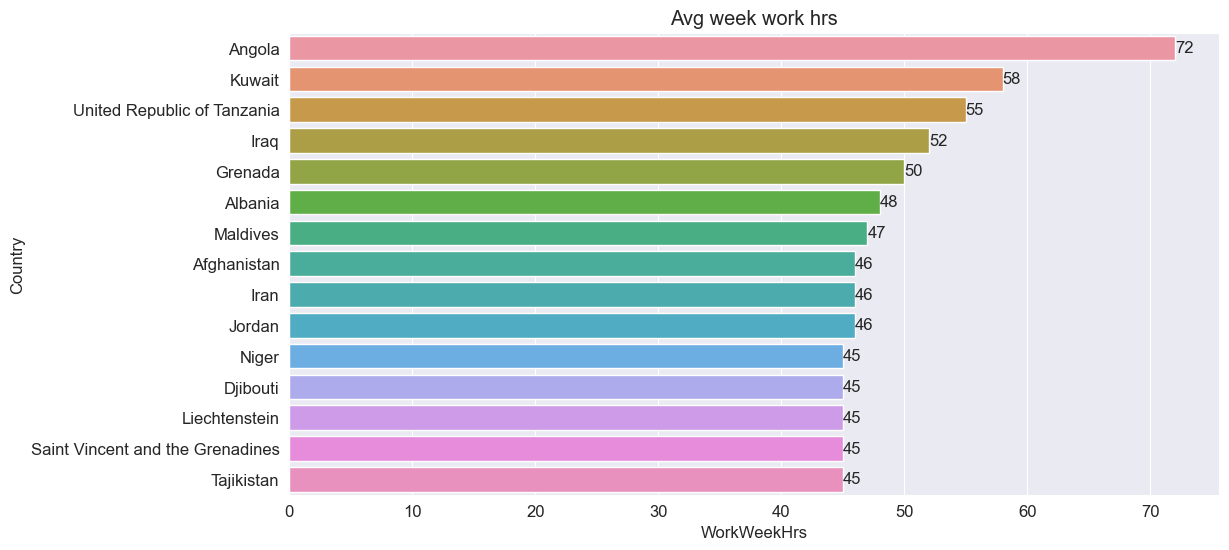

In [70]:
plt.title('Avg week work hrs')
plt.xlabel('Number of hrs')
plt.ylabel('Name of country')
ax=sns.barplot(x=hr, y=hr.index);
for label in ax.containers:
    ax.bar_label(label)

Most of the countries has 45-46 week hrs but the highest work week hrs 72 in Angola is probably a mistake because the limit is 54 hrs per week.

In [71]:
schema.NEWStuck

'What do you do when you get stuck on a problem? Select all that apply.'

In [72]:
df.NEWStuck

0        Visit Stack Overflow;Go for a walk or other ph...
1        Visit Stack Overflow;Go for a walk or other ph...
2                                                      NaN
3                                                      NaN
4        Call a coworker or friend;Visit Stack Overflow...
                               ...                        
64456                            Call a coworker or friend
64457                                                  NaN
64458                                                  NaN
64459       Call a coworker or friend;Visit Stack Overflow
64460    Meditate;Visit Stack Overflow;Go for a walk or...
Name: NEWStuck, Length: 64373, dtype: object

In [73]:
prob = split_col(df.NEWStuck)
prob

,Visit Stack Overflow,Go for a walk or other physical activity,Do other work and come back later,Call a coworker or friend,Watch help / tutorial videos,Visit another developer community (please name):,Play games,Meditate,Panic
0,True,True,True,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,True,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...
64456,False,False,False,True,False,False,False,False,False
64457,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False
64459,True,False,False,True,False,False,False,False,False


In [74]:
per = prob.mean().sort_values(ascending=False).head(5) * 100
per

Visit Stack Overflow                        76.859864
Do other work and come back later           46.123375
Watch help / tutorial videos                44.782751
Call a coworker or friend                   42.280149
Go for a walk or other physical activity    36.678421
dtype: float64

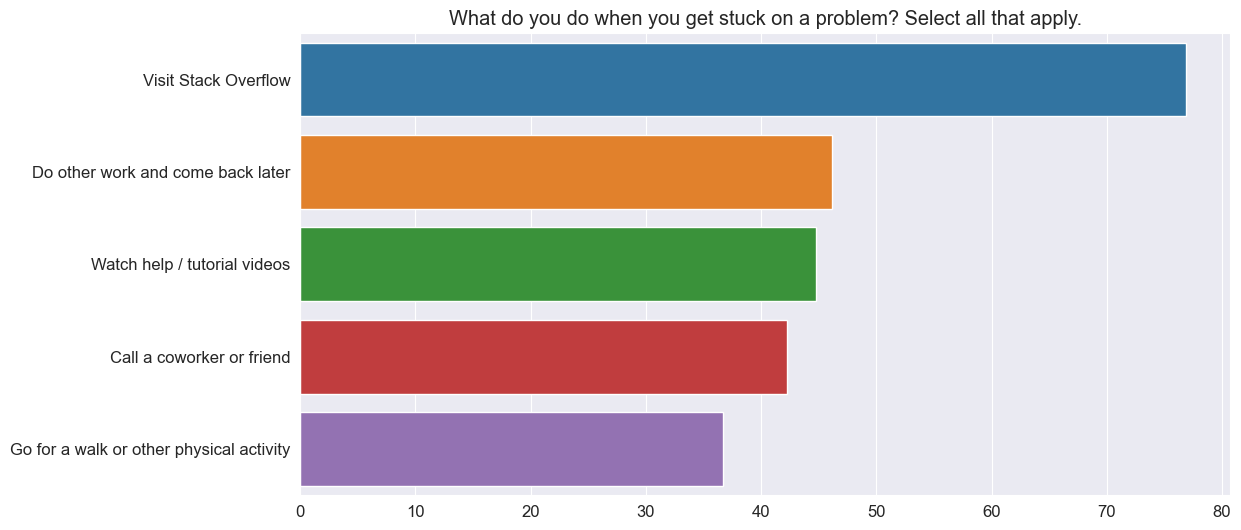

In [75]:
plt.title(schema.NEWStuck)
sns.barplot(x=per, y=per.index);

More than 70 percent of the people visits stack overflow but not all the people visits stackoverflow. There are many methods people use when they stumble upon a problem.

## Conclusions

 - Most of the people who participated in the survey were from United States and India, it maybe due to the reason that the platform(Stackoverflow) is in English and people from these countries knows English well and there can be many people who aree not good in English. There are many pltforms available on the internet for people use.
 - The people who took the survey falls into the 15-50 yrs age category.
 - 92 percent of the people who participated in the survey were male and only 7.5 percent were females so it's better to give oppertunities to the other gender as well.
 - The most of the people are those who has done masters or bachlelors in the branch related to computer Science but there are many others as well who didn't do from computer Science and some people haven't even done. So it's not must to have a computer Science degree to enter in this field.
 - Most of the people are satisfied by their job but there are people as well who are not satisfied by their job there can be multiple reasons behind it like- work hours, over time etc.
 - The most used programming languages are- js, html/css, python, java etc. Python is a general purpose language which is used in many fields like data science, back end, creating games or application etc and it's really easy to learn. And html/css are used in front end in web development and is easy to use. And they're one of the most used languages by students too.
 - Most of the people wants to learn Python, html/css, js because they're not only powerful but also easy to learn and use. And now these days most of the people use web if they wanna access something.
 - In most of the countries the max hrs people are around 47-48 but there are countries with more than 50 hrs of week hrs which is not really that great and max week work hours is in Mauritania(54 hrs) and there are values above 54 hrs so that's probably incorrect.